### **Texas Price Prediction: Payroll Analysis, Modeling, and Insights**

### **Introduction**

- Government payroll data can provide valuable insights into salary trends, public sector compensation structures, and workforce allocation.
- Understanding the distribution of pay among Texas state employees helps identify patterns in employment, potential pay gaps, and department-level budget allocations.
- This project explores payroll data from Texas state employees to analyze, model, and uncover insights related to salary distributions, disparities, and trends over time.

### **Objective**

- The primary objective of this project is to perform **Exploratory Data Analysis (EDA)**, **predictive modeling**, and generate **insights** from Texas state employee payroll data.
- We aim to build a machine learning model that can estimate an employee’s payroll based on features like job title, agency, location, and employment type.
- Additionally, the project addresses analytical questions such as detecting salary outliers, comparing wages across departments, and monitoring changes in compensation patterns.

### **Problem Statement**

- Given a dataset of Texas state employees, including attributes such as job classification, agency name, work location, and salary details, the task is to:
  - Build a regression model to predict the **payroll amount**.
  - Explore **changes in payroll and compensation trends over time**.

- This analysis can assist public administrators, researchers, and policy makers in making data-driven decisions to ensure fair and efficient payroll management in the public sector.



## Importing Necessary Libraries :

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import   ColumnTransformer
import math
import warnings
warnings.filterwarnings('ignore')
os.environ["JOBLIB_MULTIPROCESSING"] = "0"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"


## Load the Dataset :

In [2]:
file_path=os.path.join(os.path.dirname(os.getcwd()),'data','raw_data','salary.csv')
try:
    if os.path.exists(file_path) is not True :
        raise FileNotFoundError(f'The required file path is not found : {file_path}')
    df=pd.read_csv(file_path)
    print('Dataset Loaded Succesfully ...')
    print(f'Dataset have : {df.shape[0] } rows and {df.shape[1]} columns.')
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f'Unexpected error is occcured :{str(e)}')

Dataset Loaded Succesfully ...
Dataset have : 149481 rows and 21 columns.


## **Basic Data Checks**

Before diving into data cleaning or modeling, we conduct initial checks to understand the structure and quality of the dataset. This includes:

- Viewing sample rows
- Checking dataset shape and column names
- Inspecting data types
- Identifying missing values
- Generating summary statistics
- Detecting object-type (categorical) features
- Checking for duplicate entries


In [3]:
# Show first 5 rows
display(df.head())

# Shape of the dataset
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Object type columns (Categorical features)
print("\nCategorical Columns:")
print(df.columns[df.dtypes == 'object'].tolist())

# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN



Dataset Shape: 149481 rows and 21 columns

Column Names:
['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE', 'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER', 'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search']

Data Types:
AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000



Categorical Columns:
['AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE', 'duplicated', 'combined_multiple_jobs', 'hide_from_search']

Duplicate Rows: 0


##  Basic Data Checks

### 1. Dataset Shape
- **Rows:** 149,481
- **Columns:** 21

### 2. Column Names
- ['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE', 'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER', 'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search']


### 3. Data Types
| Column                    | Type     |
|---------------------------|----------|
| AGENCY                    | int64    |
| AGENCY NAME               | object   |
| LAST NAME                | object   |
| FIRST NAME               | object   |
| MI                       | object   |
| CLASS CODE               | object   |
| CLASS TITLE              | object   |
| ETHNICITY                | object   |
| GENDER                   | object   |
| STATUS                   | object   |
| EMPLOY DATE              | object   |
| HRLY RATE                | float64  |
| HRS PER WK               | float64  |
| MONTHLY                  | float64  |
| ANNUAL                   | float64  |
| STATE NUMBER             | int64    |
| duplicated               | object   |
| multiple_full_time_jobs | float64  |
| combined_multiple_jobs   | object   |
| summed_annual_salary     | float64  |
| hide_from_search         | object   |

### 4. Missing Values
| Column                    | Missing Values |
|---------------------------|----------------|
| duplicated                | 149,338        |
| multiple_full_time_jobs   | 149,467        |
| combined_multiple_jobs    | 149,384        |
| summed_annual_salary      | 149,465        |
| hide_from_search          | 149,465        |

>  Other columns have **0 missing values**.

### 5. Summary Statistics (Selected Columns)
| Column                 | Count     | Mean       | Std Dev    | Min     | Max       |
|------------------------|-----------|------------|------------|---------|-----------|
| HRLY RATE              | 149,481   | 0.35       | 4.21       | 0.00    | ~170.00   |
| HRS PER WK             | 149,481   | 39.71      | 2.32       | 0.00    | 40.00     |
| MONTHLY                | 149,481   | 4226.18    | 2093.11    | 0.00    | ~30,000   |
| ANNUAL                 | 149,481   | 50,714.21  | 25,117.34  | 0.00    | ~360,000  |
| summed_annual_salary   | 16        | 74,303.96  | 51,925.94  | ~14,000 | ~165,000  |





In [4]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print('_________________________________')

AGENCY
[241 212 696 302 601 510 520 537 530 529 551 771 772 101 104 102 303 809
 103 105 201 211 213 215 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 242 243 300 301 304 306 307 313 320 323 326 329 332 338 352 360
 401 403 405 407 448 452 454 455 457 458 459 460 464 469 473 479 481 503
 508 513 515 533 542 554 608 644 701 781 802 813 907 930 116 305 308 312
 327 347 356 359 362 364 409 411 450 451 456 466 475 476 477 504 507 514
 578 580 582 592 808]
113
_________________________________
AGENCY NAME
['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES     

###  Data Cleaning & Preprocessing:

In [6]:
# Creating Employe name for furthur preprocessing and analyzing
df['EMP_NAME']=df['FIRST NAME']+df['LAST NAME']+df['MI']
df.drop(columns=['FIRST NAME','LAST NAME','MI'],inplace=True)

In [7]:
df.head()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,EMP_NAME
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN,MORTON RUCKER ...
1,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True,MORTON RUCKER ...
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN,JOHN SPECIA JR ...
3,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True,JOHN SPECIA JR ...
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN,ESTHER ONTIVEROS ...


In [8]:
# Strip extra whitespace from object columns
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype(str).str.strip()

In [9]:
df.head()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,EMP_NAME
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",JD25,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,nan,131407.08,nan,MORTON RUCKER ...
1,212,OFFICE OF COURT ADMINISTRATION,3524,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,nan,NaN,True,MORTON RUCKER ...
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",JD25,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,nan,131407.08,nan,JOHN SPECIA JR ...
3,212,OFFICE OF COURT ADMINISTRATION,3524,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,nan,NaN,True,JOHN SPECIA JR ...
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,4504,CORREC OFFICER IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,nan,NaN,nan,ESTHER ONTIVEROS


In [10]:
'''since we dont need all the columns which doesn't use for further 
modelling and analysis we can just drop these irrelevant/redundant columns '''
df.drop(columns=['AGENCY',"EMP_NAME", 'CLASS CODE', 
                 'duplicated', 'hide_from_search', 'summed_annual_salary'], inplace=True)


In [11]:
##Convert 'EMPLOY DATE' to datetime and extract features
df['EMPLOY DATE']=pd.to_datetime(df['EMPLOY DATE'],errors='coerce')
df['EMPLOY_YEAR']=df['EMPLOY DATE'].dt.year
df['TENURE']=2025-df['EMPLOY_YEAR']

In [12]:
# Drop original date column:
df.drop(columns=['EMPLOY DATE'], inplace=True)

In [13]:
df.isnull().sum()

AGENCY NAME                     0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
multiple_full_time_jobs    149467
combined_multiple_jobs          0
EMPLOY_YEAR                     0
TENURE                          0
dtype: int64

In [14]:
## Dropping irrelavent columns which have 90% null values and does have any impact on the salary prediction.
df.drop(columns=['multiple_full_time_jobs','combined_multiple_jobs','STATE NUMBER'], inplace=True)

In [15]:
df

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY_YEAR,TENURE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,1988,37
1,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,2015,10
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,2020,5
3,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,2018,7
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,CORREC OFFICER IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,2020,5
...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD,SECURITY OFFICER III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,34788.00,2017,8
149477,STATE PRESERVATION BOARD,WEB ADMINISTRATOR III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,66000.00,2015,10
149478,STATE PRESERVATION BOARD,CUSTOMER SERVICE REP I,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20,2012,13
149479,STATE PRESERVATION BOARD,PROGRAM SPECIALIST III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,68929.92,1989,36


In [16]:
# Track which employees are paid hourly vs not .
df['is_hourly'] = (df['HRLY RATE'] > 0).astype(int)

In [17]:
df['is_hourly'].value_counts()

is_hourly
0    147733
1      1748
Name: count, dtype: int64

In [18]:
df[df['is_hourly'] == 1]  

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY_YEAR,TENURE,is_hourly
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,1988,37,1
1,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,2015,10,1
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,2020,5,1
3,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,2018,7,1
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,49.40717,20.0,4281.95,51383.40,2020,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
149467,STATE PRESERVATION BOARD,CUSTOMER SERVICE REP I,WHITE,MALE,CTF - CLASSIFIED TEMPORARY FULL-TIME,11.50000,40.0,1993.33,23919.96,2018,7,1
149468,STATE PRESERVATION BOARD,CUSTOMER SERVICE REP I,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,12.00000,20.0,1040.00,12480.00,2018,7,1
149474,STATE PRESERVATION BOARD,CUSTOMER SERVICE REP I,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,11.50000,20.0,996.66,11959.92,2020,5,1
149478,STATE PRESERVATION BOARD,CUSTOMER SERVICE REP I,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20,2012,13,1


In [19]:
df[df['is_hourly'] == 0]

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY_YEAR,TENURE,is_hourly
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,CORREC OFFICER IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,3284.27,39411.24,2020,5,0
5,OFFICE OF THE ATTORNEY GENERAL,DIRECTOR IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,12899.00,154788.00,2020,5,0
6,TEXAS DEPARTMENT OF TRANSPORTATION,CONTRACT SPEC IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,5835.50,70026.00,2020,5,0
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL,DIRECTOR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,10000.00,120000.00,2020,5,0
9,DEPARTMENT OF STATE HEALTH SERVICES,INSPECTOR III,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,3447.25,41367.00,2019,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149473,STATE PRESERVATION BOARD,CREATIVE MEDIA DESIGNER I,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,3658.42,43901.04,2008,17,0
149475,STATE PRESERVATION BOARD,EXECUTIVE DIRECTOR,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,0.0,40.0,14665.83,175989.96,2016,9,0
149476,STATE PRESERVATION BOARD,SECURITY OFFICER III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,2899.00,34788.00,2017,8,0
149477,STATE PRESERVATION BOARD,WEB ADMINISTRATOR III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,5500.00,66000.00,2015,10,0


In [20]:
# Checking Data types of featuers .
df.dtypes


AGENCY NAME     object
CLASS TITLE     object
ETHNICITY       object
GENDER          object
STATUS          object
HRLY RATE      float64
HRS PER WK     float64
MONTHLY        float64
ANNUAL         float64
EMPLOY_YEAR      int32
TENURE           int32
is_hourly        int64
dtype: object

In [21]:
df.isnull().sum()

AGENCY NAME    0
CLASS TITLE    0
ETHNICITY      0
GENDER         0
STATUS         0
HRLY RATE      0
HRS PER WK     0
MONTHLY        0
ANNUAL         0
EMPLOY_YEAR    0
TENURE         0
is_hourly      0
dtype: int64

In [22]:
# Cleaning the mismatched data from the dataframe :
df['AGENCY_FREQ']=df['AGENCY NAME'].replace(df['AGENCY NAME'].value_counts().to_dict())
df['CLASS_TITLE_FREQ']=df['CLASS TITLE'].map(df['CLASS TITLE'].value_counts().to_dict())
df['TENURE']=df['TENURE'].apply(lambda x: str(x).replace(str(x),str(abs(x)))if x<0 else x)
df['EMPLOY_YEAR']=df['EMPLOY_YEAR'].apply(lambda x : int(str(x).replace('20','19',1) if x >2025 else x))
df['TENURE']=df['TENURE'].astype(int)

### Exploratory Data Analysis : Understand Distributions

## Univariate Analysis: 

In [23]:
# Segregating the featuers into Numerical and Categorical columns .
Numerical_columns=df.select_dtypes(exclude="O")
Categorical_columns=df.select_dtypes(include='O')

In [24]:
Numerical_columns

,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY_YEAR,TENURE,is_hourly,AGENCY_FREQ,CLASS_TITLE_FREQ
0,75.96150,29.0,9545.82,114549.84,1988,37,1,1033,324
1,81.04454,4.0,1404.77,16857.24,2015,10,1,266,47
2,75.96150,29.0,9545.82,114549.84,2020,5,1,1033,324
3,81.04453,4.0,1404.77,16857.24,2018,7,1,266,47
4,0.00000,40.0,3284.27,39411.24,2020,5,0,35926,9267
...,...,...,...,...,...,...,...,...,...
149476,0.00000,40.0,2899.00,34788.00,2017,8,0,221,385
149477,0.00000,40.0,5500.00,66000.00,2015,10,0,221,48
149478,12.93000,20.0,1120.60,13447.20,2012,13,1,221,221
149479,0.00000,40.0,5744.16,68929.92,1989,36,0,221,1082


In [25]:
Hist_cols=Numerical_columns.drop(columns='is_hourly',axis=1).columns.to_list()
Hist_cols

['HRLY RATE',
 'HRS PER WK',
 'MONTHLY',
 'ANNUAL',
 'EMPLOY_YEAR',
 'TENURE',
 'AGENCY_FREQ',
 'CLASS_TITLE_FREQ']

In [26]:
## visualizing the distribution, checking for skewness, and identifying outliers for Numerical featuers .
def numeric_univariate_analysis( Numerical_columns_df: pd.DataFrame):
    num_columns=Numerical_columns.columns
    sns.set_theme(style="whitegrid")
    n_cols=2
    n_rows=math.ceil(len(num_columns)/n_cols)
    plt.figure(figsize=(6*n_cols,5*n_rows))
    plt.suptitle('Numerical Features Distribution', fontsize=24, fontweight='bold', color='Black', y=1.01, style='italic')
    for index,column in enumerate(num_columns,start=1):
        ax=plt.subplot(n_rows,n_cols,index)
        if column in Hist_cols :
            sns.histplot(data=df,x=column,bins=50,kde=True,ax=ax,color='skyblue')
            ax.set_title(f'{column} Distribution', fontsize=14, fontweight='bold')
            ax.set_xlabel(column, fontsize=12)
            ax.set_ylabel('Count')
        else:
            sns.countplot(data=df,x=column,ax=ax,palette='Set2',stat='percent')
            ax.set_title(f'{column} Distribution', fontsize=14, fontweight='bold')
            ax.set_xlabel(column, fontsize=12)
            ax.set_ylabel('Percentage')
    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()


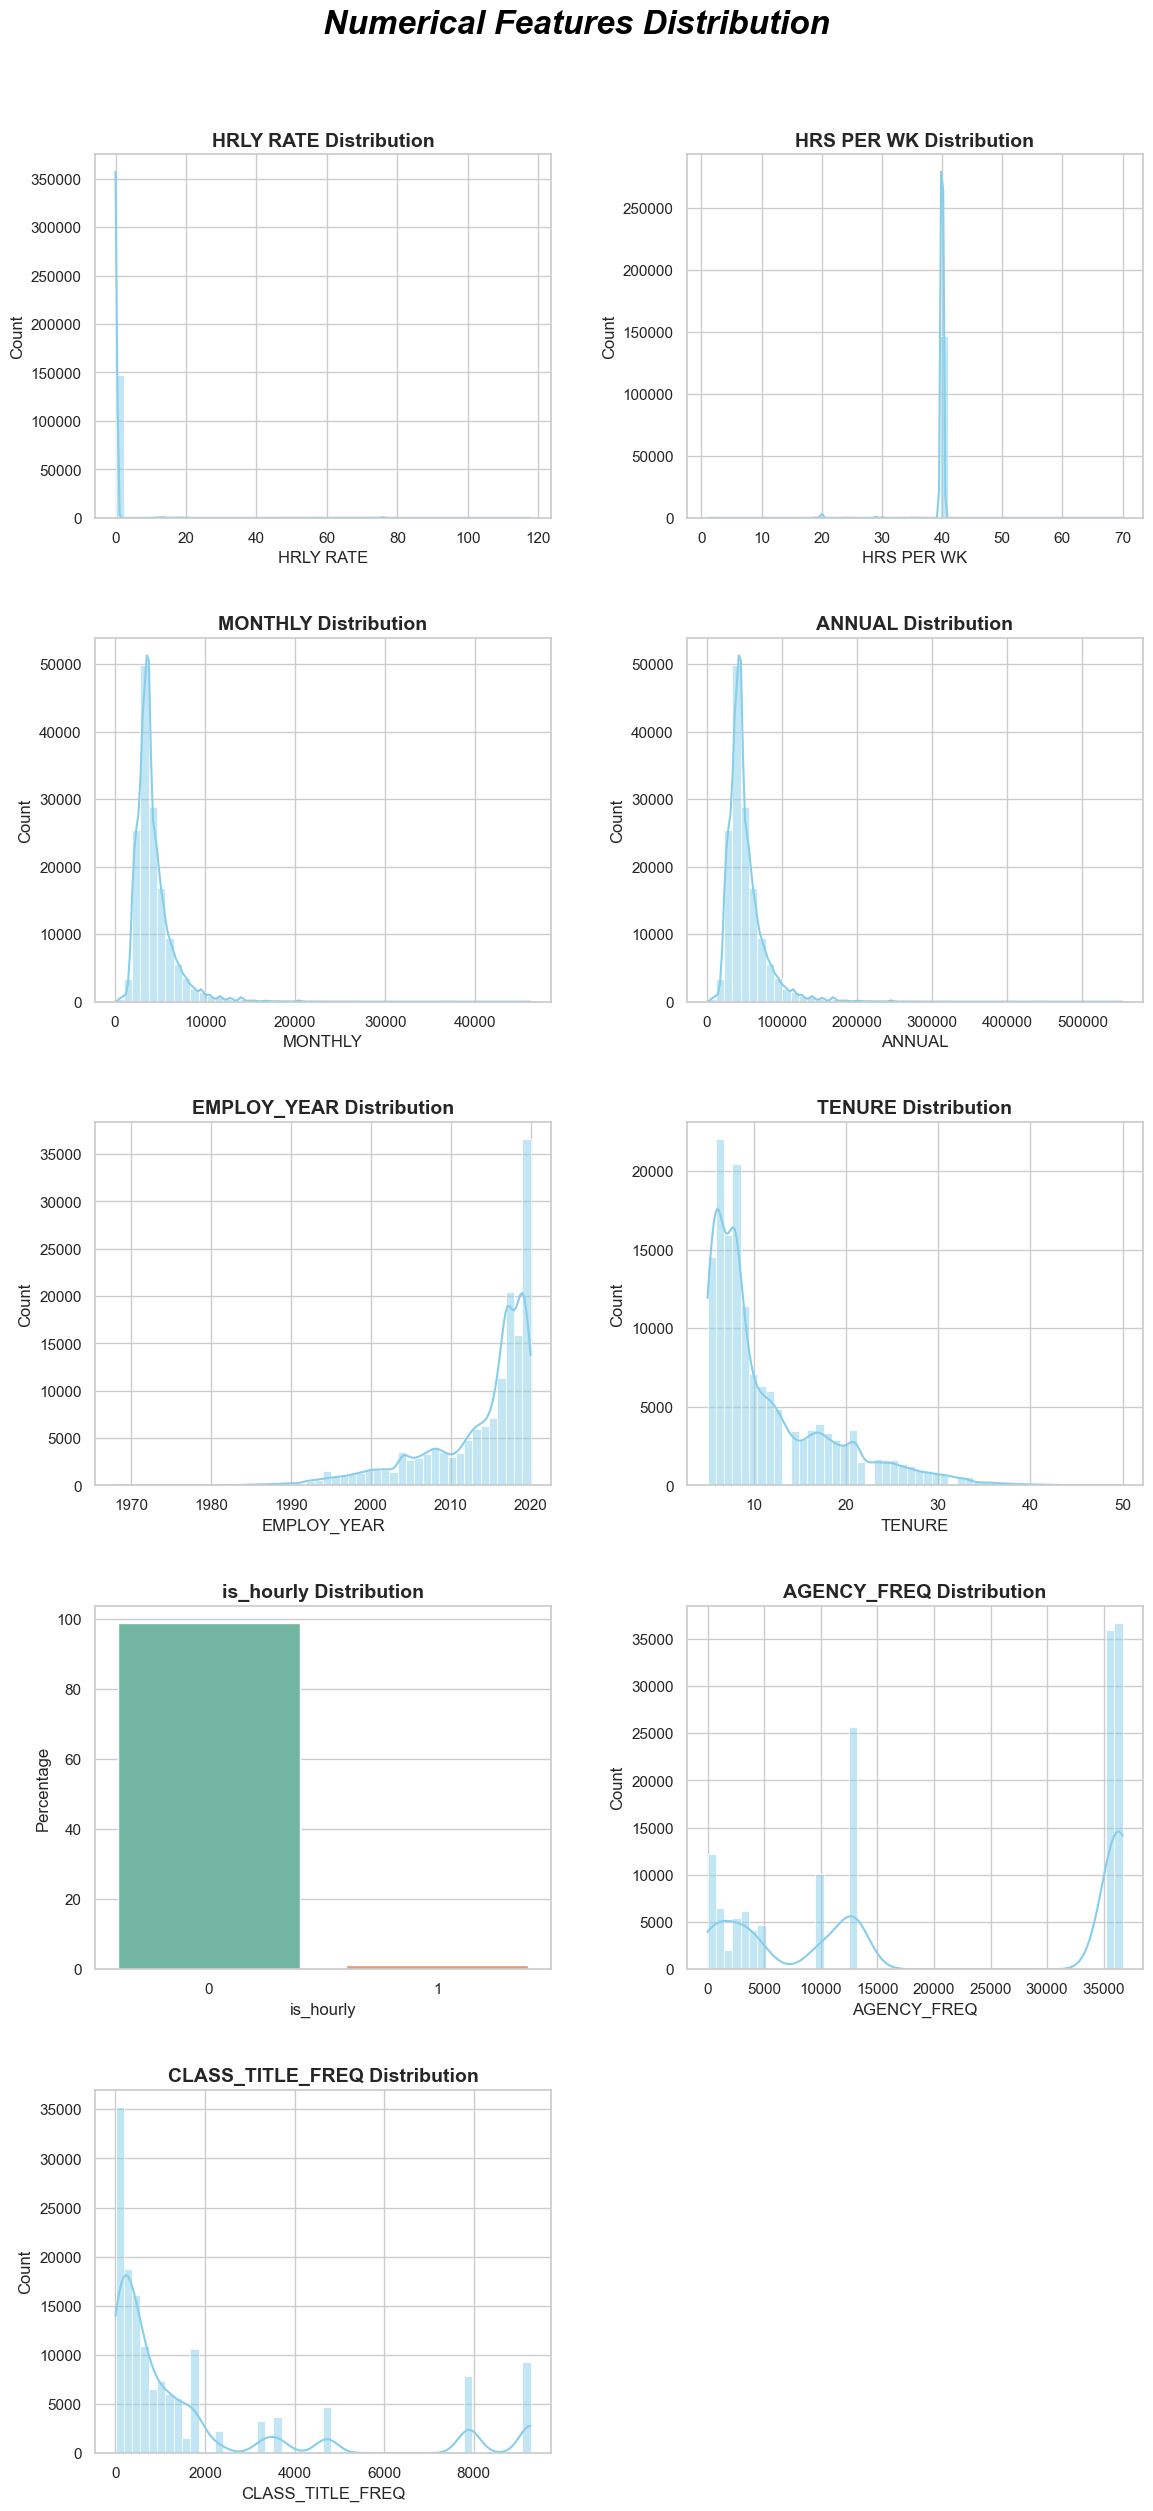

In [27]:
numeric_univariate_analysis(df)

In [28]:
cat_cols=['AGENCY NAME','CLASS TITLE']

In [29]:
## visualizing the distribution, checking for skewness, and identifying outliers for Categorical featuers .
def categorical_univariate_analysis( Numerical_columns_df: pd.DataFrame):
    cat_columns=Categorical_columns.columns
    sns.set_theme(style="whitegrid")
    n_cols=2
    n_rows=math.ceil(len(cat_columns)/n_cols)
    plt.figure(figsize=(6*n_cols,5*n_rows))
    plt.suptitle('Categorical Features Distribution', fontsize=24, fontweight='bold', color='Black', y=1.01, style='italic')
    for index,column in enumerate(cat_columns,start=1):
        if column not in cat_cols :
            ax=plt.subplot(n_rows,n_cols,index)
            sns.countplot(data=df,x=column,ax=ax,palette='Set2',stat='count')
            ax.set_title(f'{column} Distribution', fontsize=14, fontweight='bold')
            ax.set_xlabel(column, fontsize=12)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x',rotation=90)
    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()


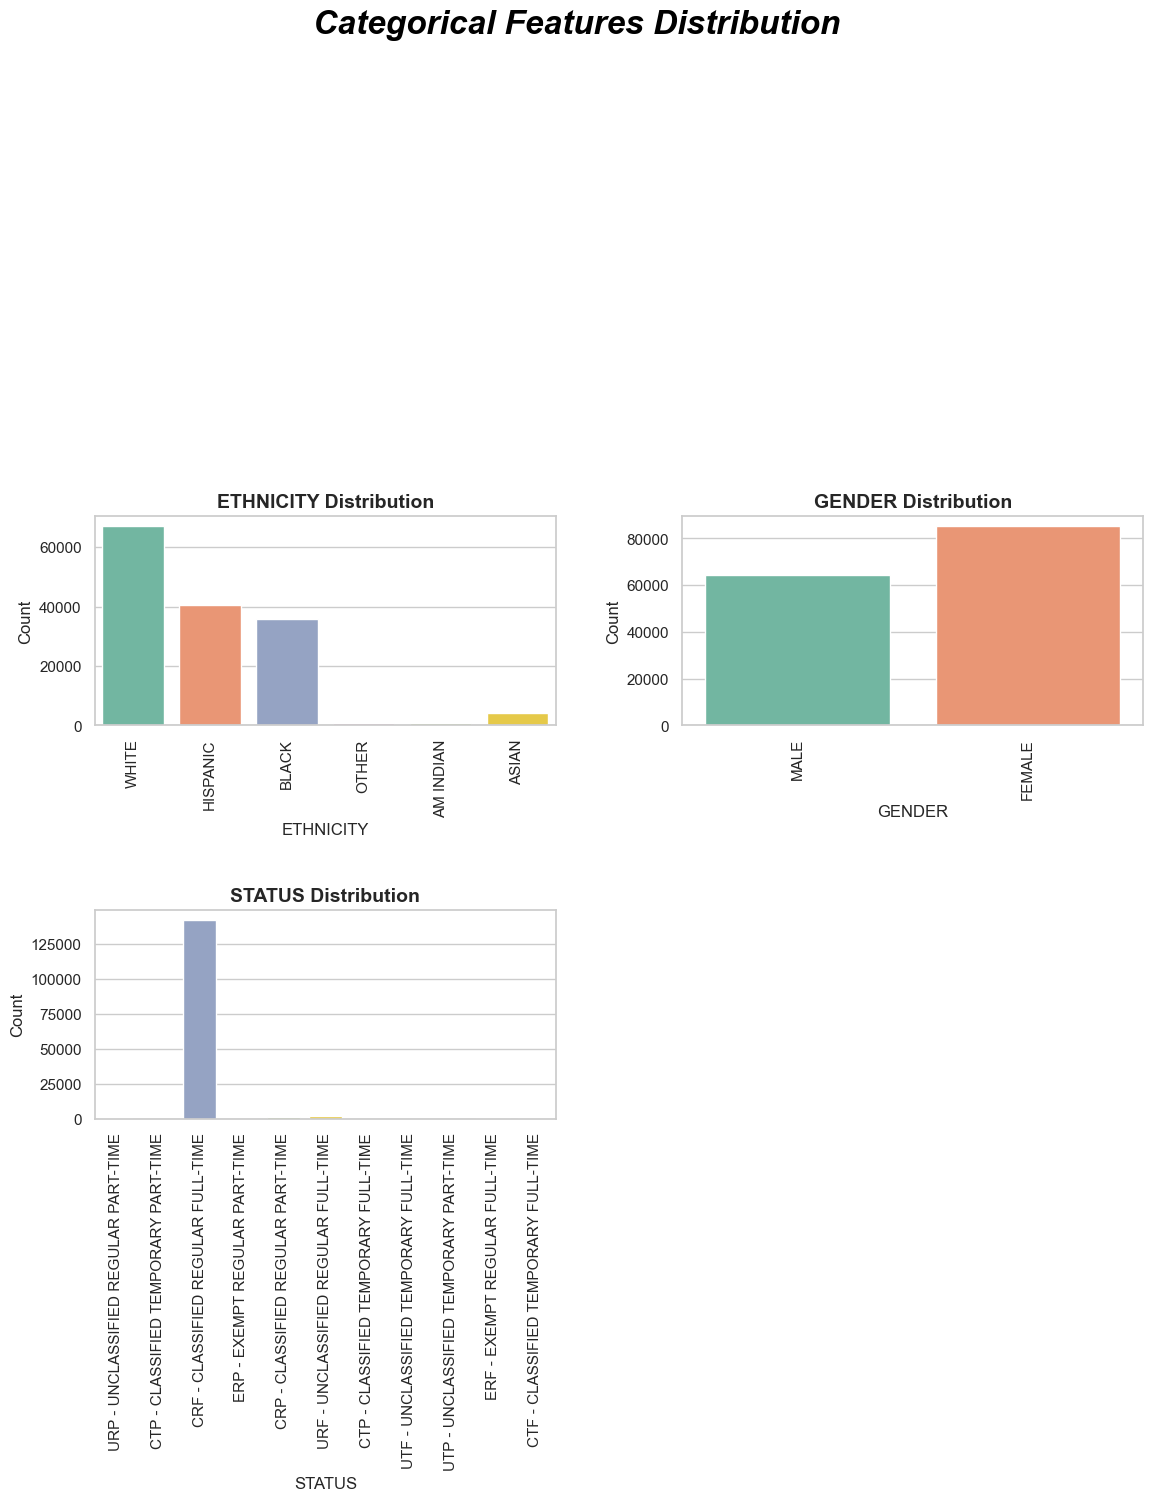

In [30]:
categorical_univariate_analysis(Categorical_columns)

## Inferences from Univariate Analysis

### Numerical Features

 1. HRLY RATE:
    - The distribution is highly right-skewed.
    - Most employees earn hourly rates below $20.
    - A few extreme values exceed $100, which may be outliers.

 2. HRS PER WK:
    - There is a sharp peak at 40 hours per week.
    - Indicates that most employees are full-time workers.

 3. MONTHLY and ANNUAL Salaries:
    - Both distributions show a long tail.
    - Salaries are concentrated in lower ranges.
    - Some very high salaries might indicate executives or outliers.

 4. EMPLOY_YEAR:
    - A sharp increase in the number of employees hired from 2015 onwards.
    - Very few employees have joining years before 1990.

 5. TENURE:
    - The majority of employees have tenure between 0 to 10 years.
    - Indicates a large proportion of relatively new employees.

 6. is_hourly:
    - The feature is heavily imbalanced toward one class.
    - Suggests most employees are either hourly or salaried, but not both.

 7. AGENCY_FREQ and CLASS_TITLE_FREQ:
    - Distributions are long-tailed.
    - A few agencies and class titles dominate, while many appear infrequently.
    - Supports the use of frequency encoding for these features.

### Categorical Features

 1. ETHNICITY:
    - Dominated by 'WHITE' group.
    - Followed by HISPANIC and BLACK groups.
    - Indicates class imbalance which should be considered during modeling.

 2. GENDER:
    - Slightly more females than males.
    - Relatively balanced, can be used directly in modeling.

 3. STATUS:
    - One category dominates the data.
    - Many categories have very few observations.
    - Grouping rare classes into 'Other' can simplify modeling.



## Bivariate Analysis:

In [31]:
df.columns.to_list()[::-1][:9]

['CLASS_TITLE_FREQ',
 'AGENCY_FREQ',
 'is_hourly',
 'TENURE',
 'EMPLOY_YEAR',
 'ANNUAL',
 'MONTHLY',
 'HRS PER WK',
 'HRLY RATE']

In [32]:
def bivariate_plots(df):
    target='ANNUAL'
    num_cols=df.columns.to_list()[::-1][:9]
    n_cols=3
    n_rows=math.ceil(len(num_cols)/n_cols)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(18, 5 * n_rows))
    plt.suptitle('Bivariate Analysis of numerical featuers', fontsize=24, fontweight='bold', color='Black', y=1.01, style='italic')
    for idx,column in enumerate(num_cols):
        ax=plt.subplot(n_rows,n_cols,idx+1)
        sns.scatterplot(data=df,x=column,y=target)
        ax.set_title(f'{column} vs {target} Distribution', fontsize=10, fontweight='bold')
        ax.set_xlabel(column)
        ax.set_ylabel(target)
    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()  

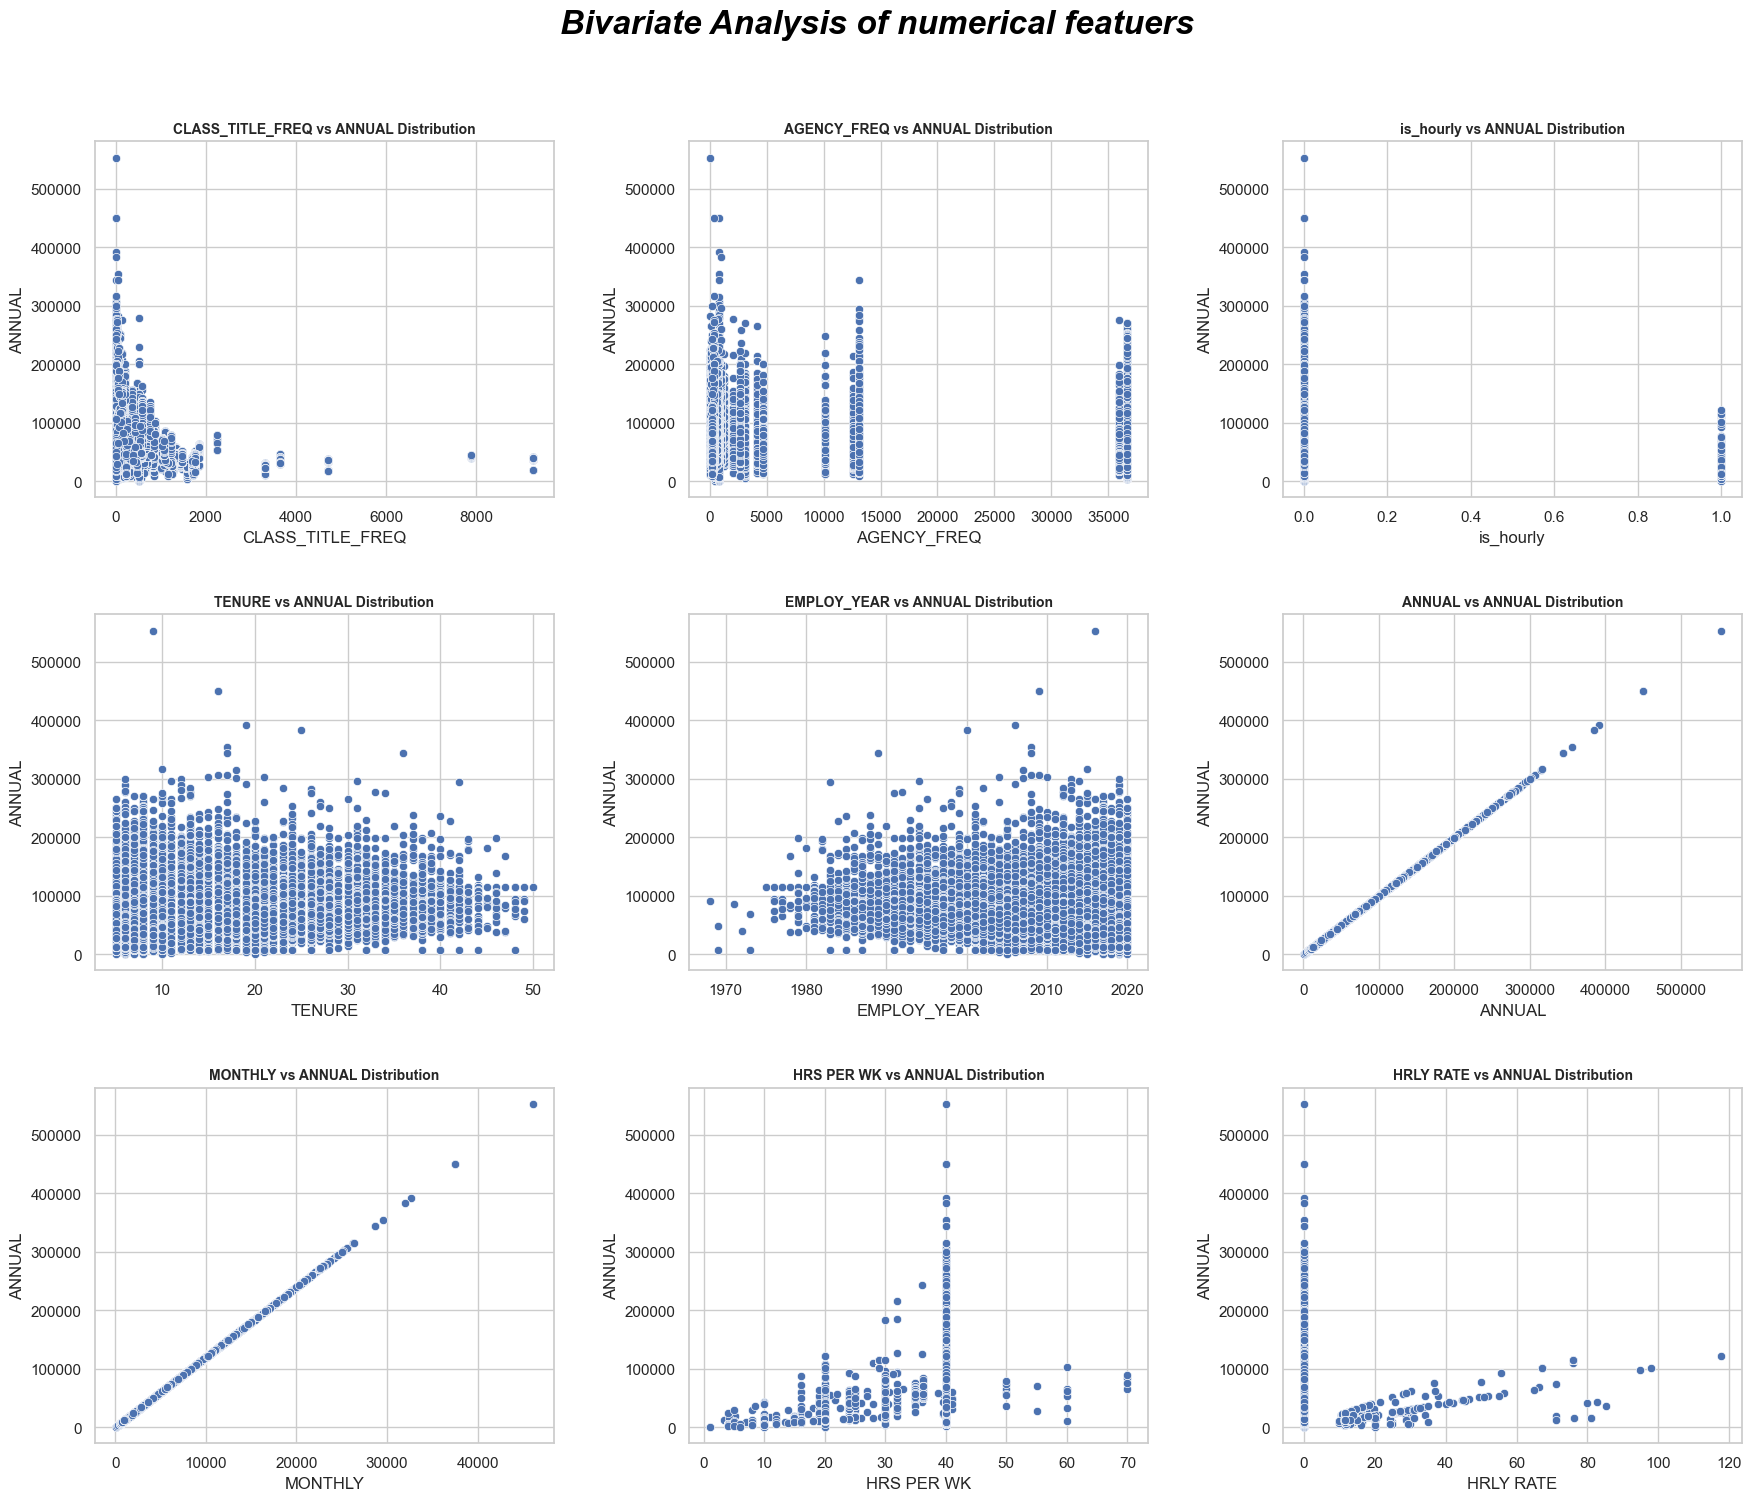

In [33]:
bivariate_plots(df)

In [34]:
def bivariate_cat_plots(df):
    target='ANNUAL'
    cat_columns=['ETHNICITY','GENDER','STATUS']
    n_cols=1
    n_rows=math.ceil(len(cat_columns)/n_cols)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12*n_cols, 5 * n_rows))
    plt.suptitle('Bivariate Analysis of numerical & categorical featuers', fontsize=24, fontweight='bold', color='Black', y=1.01, style='italic')
    for idx,column in enumerate(cat_columns):
        ax=plt.subplot(n_rows,n_cols,idx+1)
        sns.barplot(data=df,x=column,y=target,palette='Set2')
        ax.set_title(f'{column} vs {cat_columns[idx]} Distribution', fontsize=10, fontweight='bold')
        ax.set_xlabel(column,fontsize=12)
        ax.set_ylabel(target,fontsize=12)
        ax.tick_params(axis='x',rotation=90)
    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()  

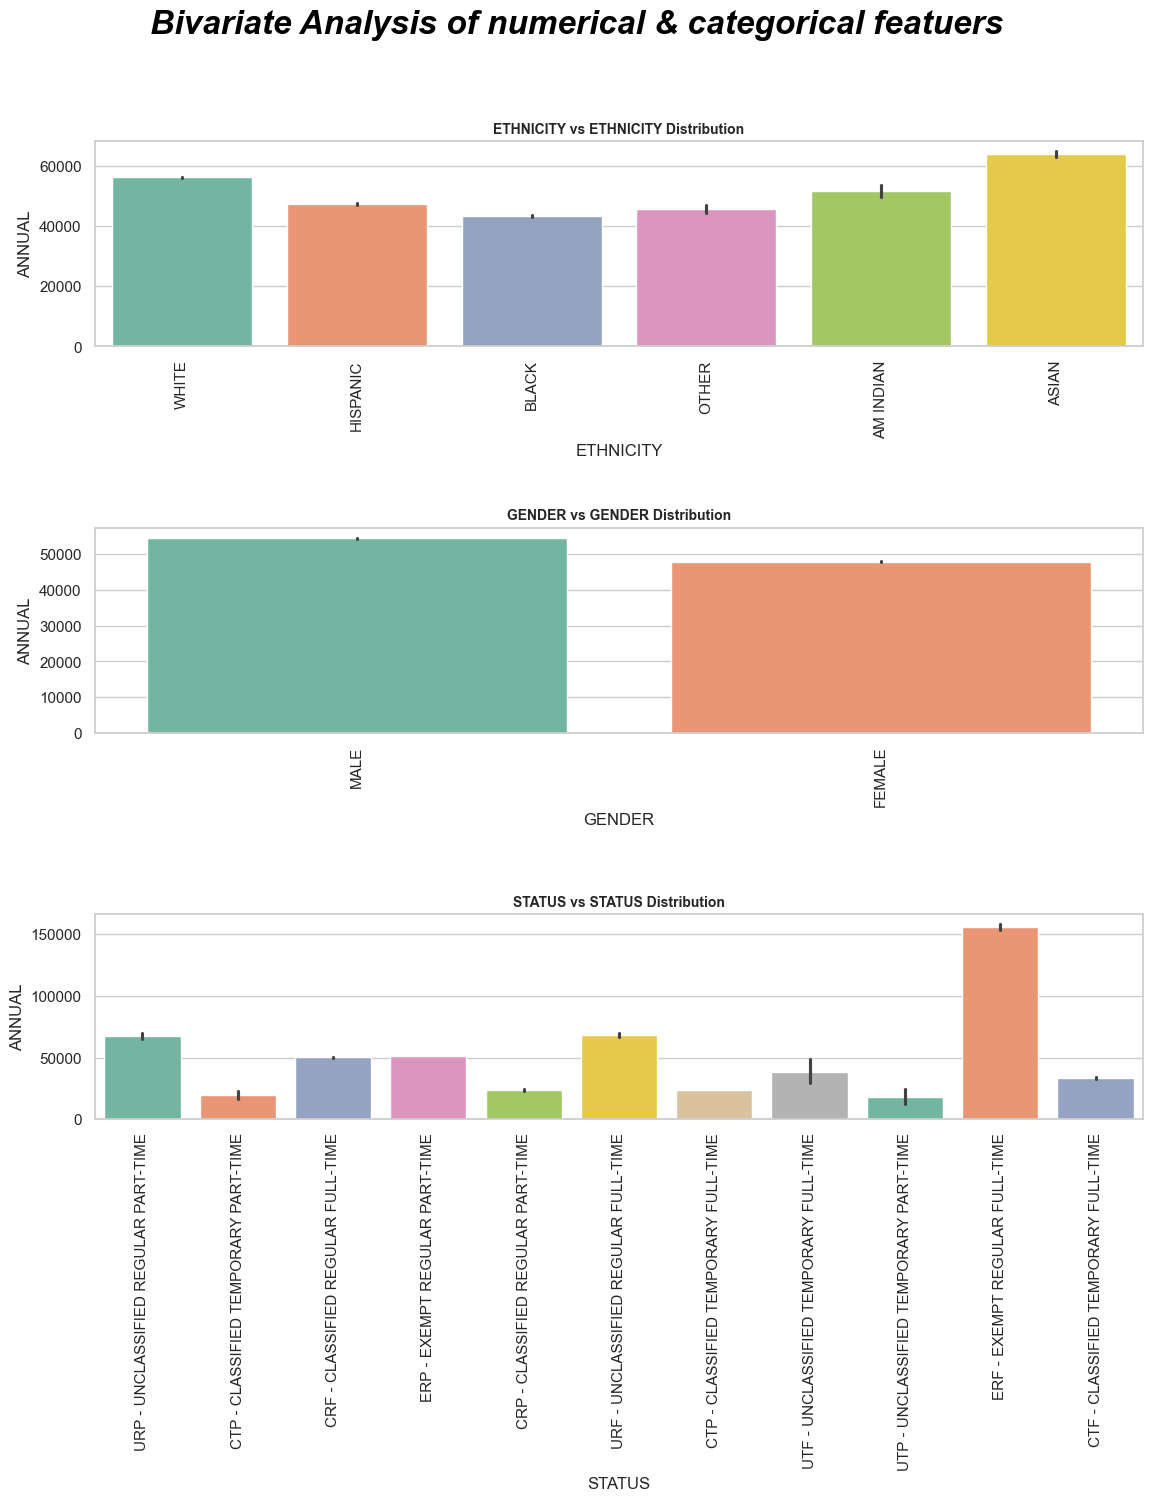

In [35]:
bivariate_cat_plots(df)

In [36]:
df.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY_YEAR,TENURE,is_hourly,AGENCY_FREQ,CLASS_TITLE_FREQ
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,1988,37,1,1033,324
1,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,2015,10,1,266,47
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION","JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,2020,5,1,1033,324
3,OFFICE OF COURT ADMINISTRATION,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,2018,7,1,266,47
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,CORREC OFFICER IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,2020,5,0,35926,9267


In [37]:
correlation_tenure = df['TENURE'].corr(df['ANNUAL'])
correlation_year = df['EMPLOY_YEAR'].corr(df['ANNUAL'])

print(f"Correlation between TENURE and ANNUAL: {correlation_tenure}")
print(f"Correlation between EMPLOY_YEAR and ANNUAL: {correlation_year}")

Correlation between TENURE and ANNUAL: 0.3040796028748087
Correlation between EMPLOY_YEAR and ANNUAL: -0.3039837176353251


##  Bivariate Analysis Insights with respect to ANNUAL Salary

### Numerical Features

1. **CLASS_TITLE_FREQ vs ANNUAL**:
   - High-frequency job titles tend to have lower annual salaries.
   - Rare job titles may be associated with both low and high salaries, indicating specialization might be rewarded.

2. **AGENCY_FREQ vs ANNUAL**:
   - Larger agencies (with more employees) do not necessarily pay more.
   - Agencies show diverse salary ranges irrespective of size.

3. **is_hourly vs ANNUAL**:
   - Salaried employees (`is_hourly = 0`) dominate the dataset.
   - Hourly workers tend to earn significantly lower annual salaries.

4. **TENURE vs ANNUAL**:
   - No clear upward trend with tenure, indicating longevity alone does not guarantee higher salary.
   - Salary range is wide even at higher tenures.

5. **EMPLOY_YEAR vs ANNUAL**:
   - More recent hires generally earn less.
   - There’s a visible increase in salary variation for employees hired earlier (pre-2000).

6. **ANNUAL vs ANNUAL**:
   - Perfect linear relationship as expected (self-comparison).

7. **MONTHLY vs ANNUAL**:
   - Strong linear relationship confirming consistency between monthly and annual reported earnings.

8. **HRS PER WK vs ANNUAL**:
   - Most employees work between 35–40 hours/week.
   - Little correlation between hours worked and salary, possibly due to fixed compensation structures.

9. **HRLY RATE vs ANNUAL**:
   - Shows proportionality for hourly employees.
   - Outliers with high hourly rates but modest annual salaries indicate part-time or contract roles.


### Categorical Features

1. **ETHNICITY vs ANNUAL**:
   - **Asian** employees have the highest average annual salary.
   - **Hispanic** and **Black** groups show comparatively lower average salaries.
   - Highlights potential disparities that may warrant further equity analysis.

2. **GENDER vs ANNUAL**:
   - **Male** employees earn slightly more on average than **Female** employees.
   - The difference, while small, indicates possible gender pay gap needing deeper review.

3. **STATUS vs ANNUAL**:
   - **ERF – EXEMPT REGULAR FULL-TIME** employees have the highest average salaries.
   - **CTP – CLASSIFIED TEMPORARY PART-TIME** and **URF – UNCLASSIFIED REGULAR FULL-TIME** have lower average salaries.
   - Full-time, exempt roles generally command higher compensation compared to part-time or temporary statuses.



<Figure size 1400x800 with 0 Axes>

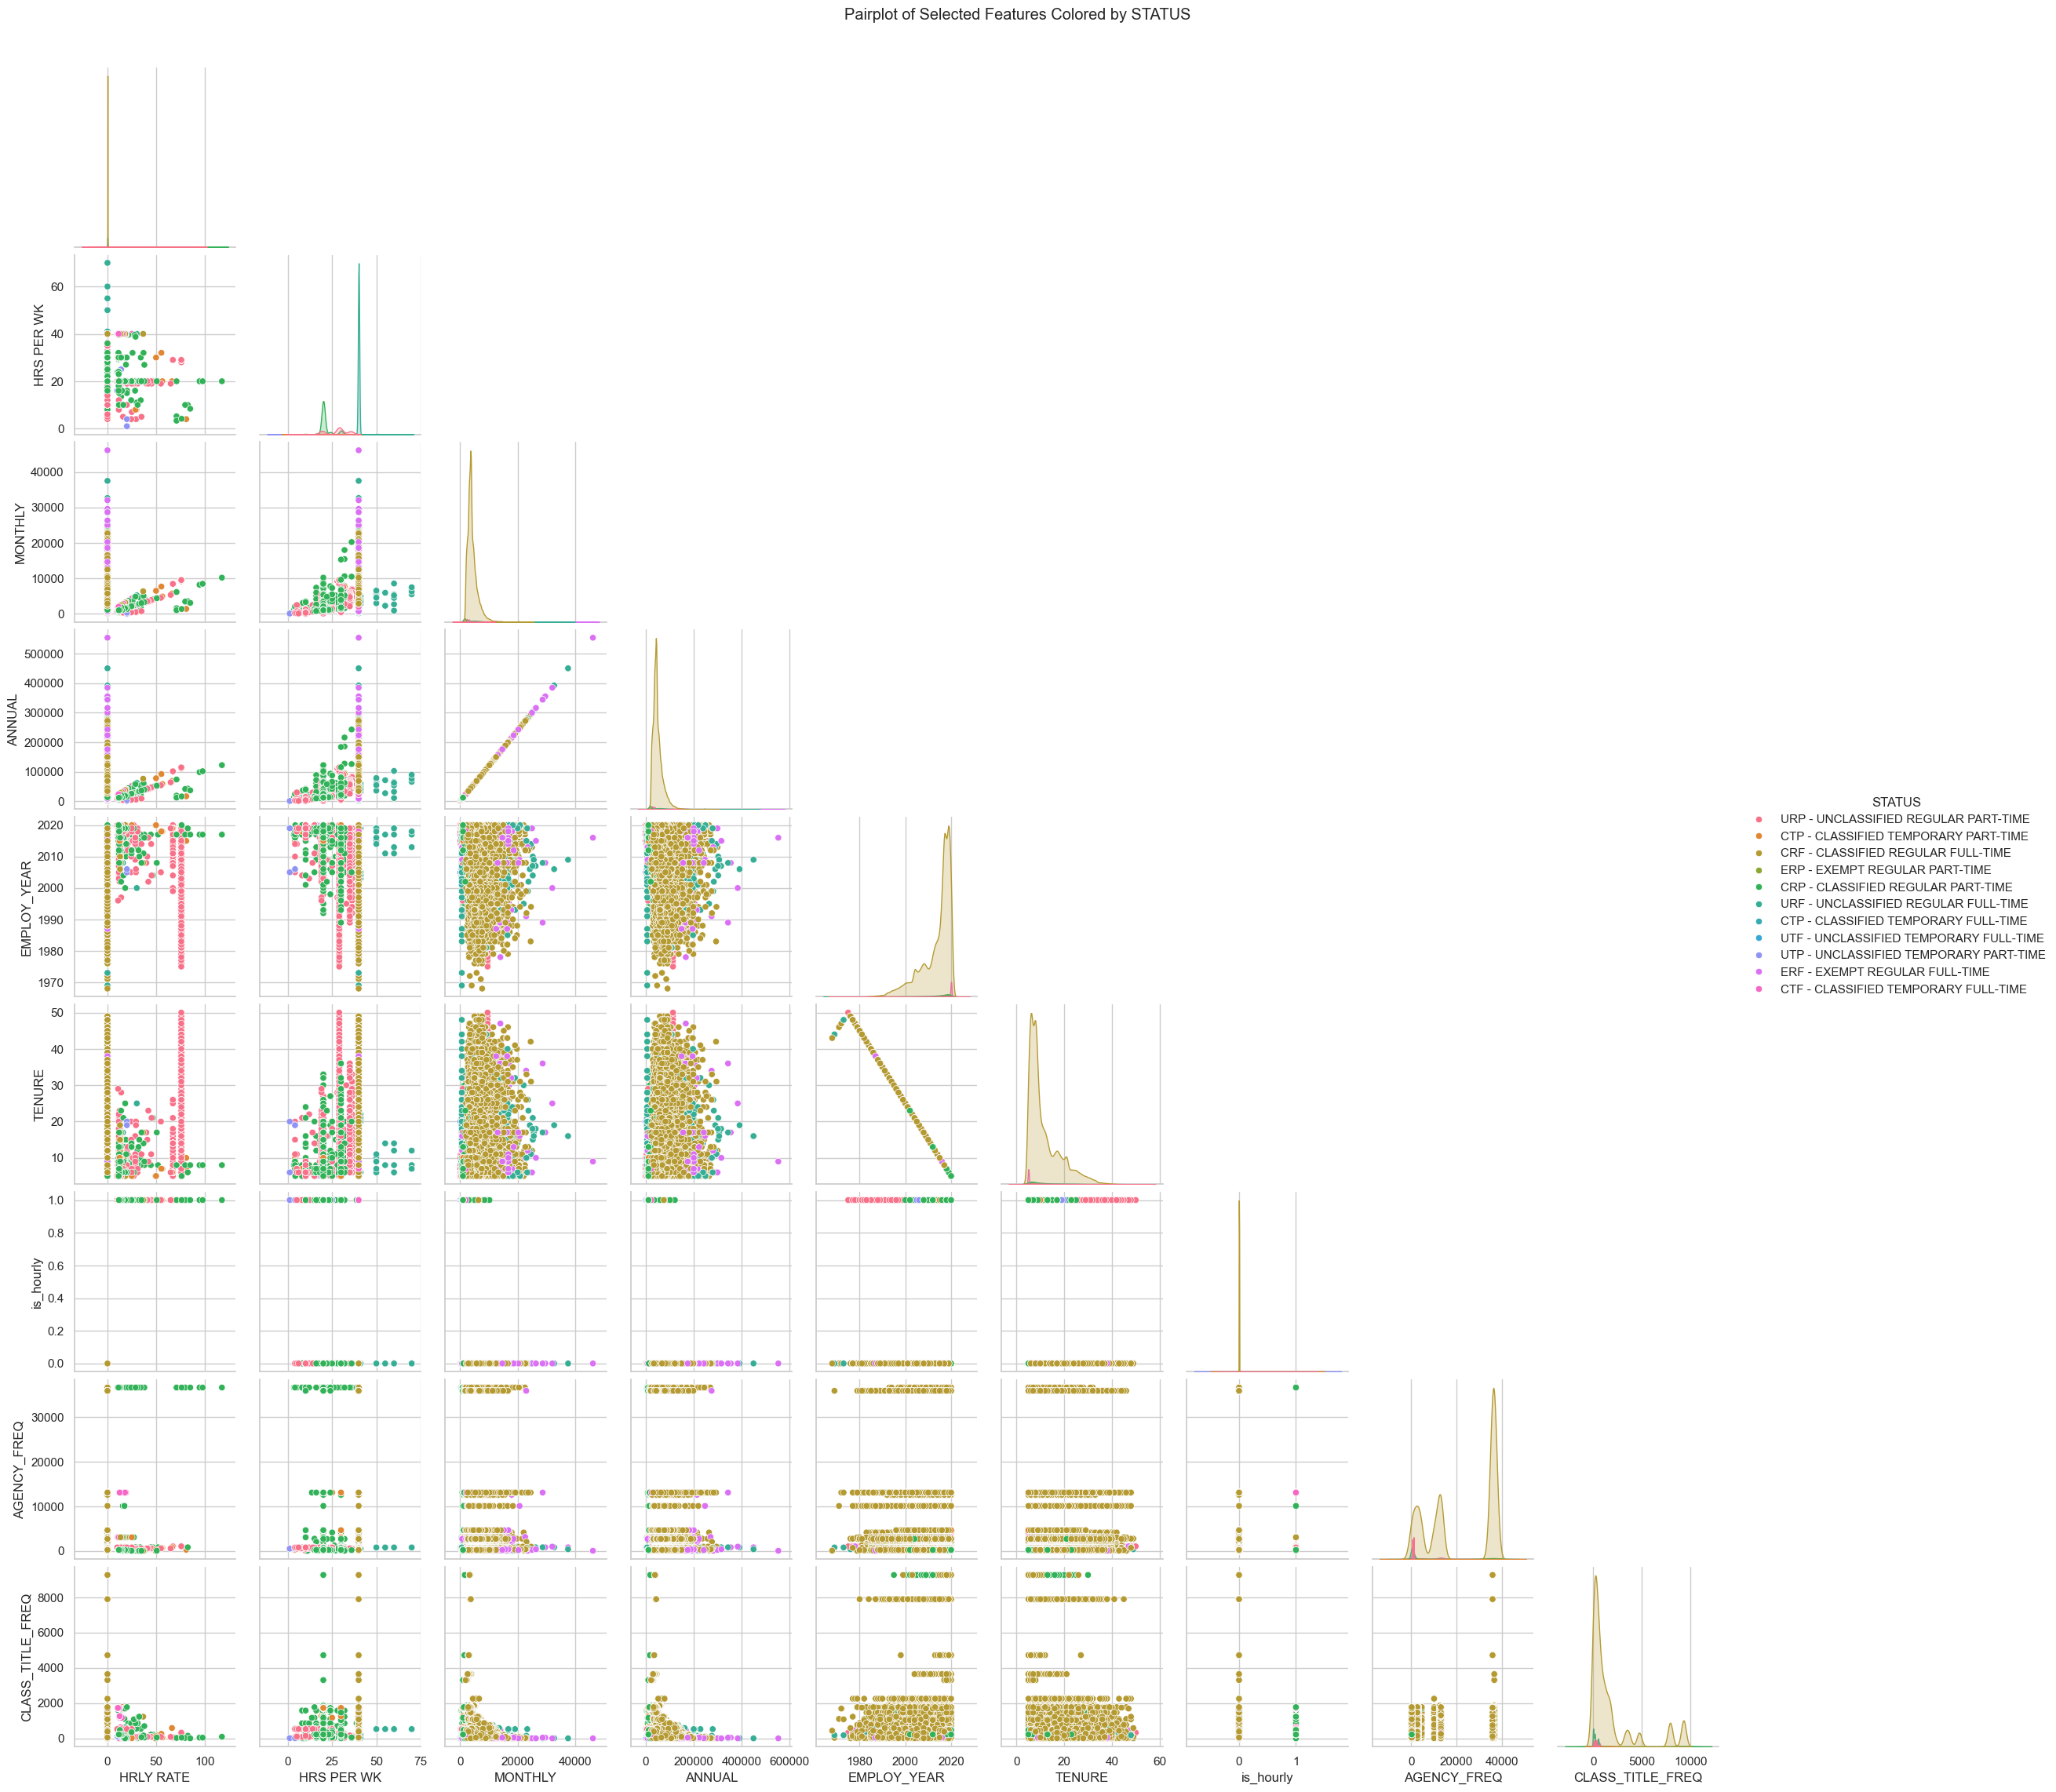

In [38]:
plt.figure(figsize=(14, 8))
sns.pairplot(df, hue='STATUS', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features Colored by STATUS", y=1.02)
plt.show()

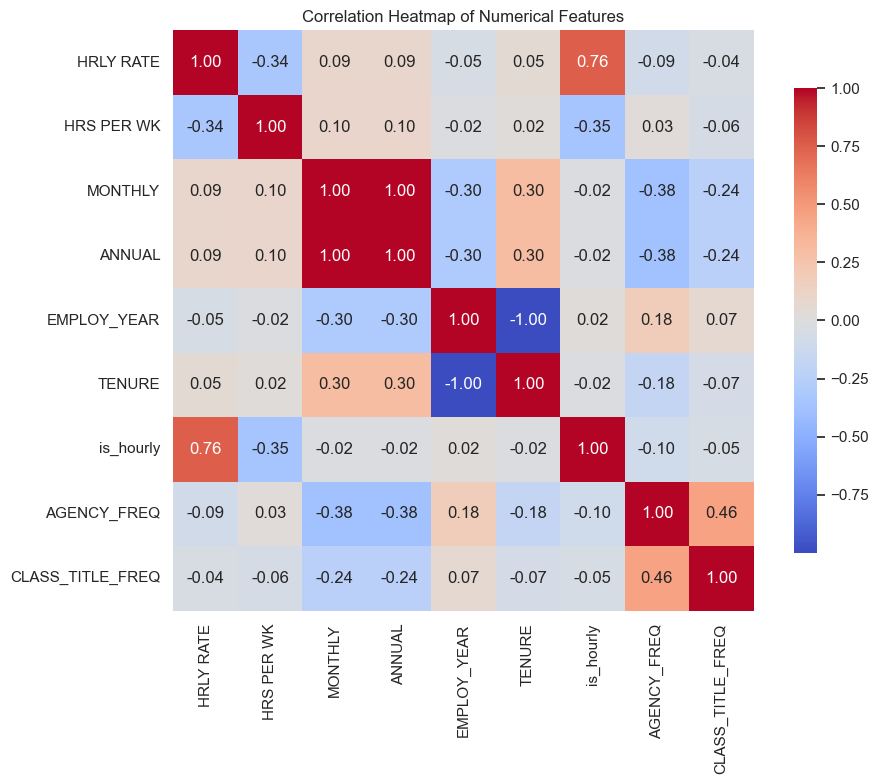

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Key Insights from Correlation Heatmap

- **MONTHLY** and **ANNUAL** salaries are perfectly correlated (1.00). One of them can be dropped to avoid redundancy.
- **EMPLOY_YEAR** and **TENURE** are perfectly inversely correlated (-1.00), indicating they carry the same information in opposite forms. Keep only one.
- **HRLY RATE** has a strong positive correlation (0.76) with **is_hourly**, confirming that hourly employees have defined hourly pay.
- Other features show low to moderate correlations, implying that most features contribute unique information to the model.

### Feature Reduction Recommendation:
- Drop **MONTHLY** and either **EMPLOY_YEAR** or **TENURE** to reduce multicollinearity and improve model interpretability.


In [40]:
## Saving the Half Preprocessed data for further operations :
try:
    file_path=os.path.join(os.path.dirname(os.getcwd()),'data','preprocessed_data')
    os.makedirs(file_path,exist_ok=True)
    df.to_csv(os.path.join(file_path,'processed_df.csv'),index=False)
    print('processed_df.csv file is saved succesfully...')
except Exception as e:
    raise f'Exception occured : {str(e)}'

processed_df.csv file is saved succesfully...
